In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Step 1: Connecting to the SQLite Database
# Create an engine to connect to the SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Step 2: Reflect the database tables using automap_base
from sqlalchemy.ext.automap import automap_base
Base = automap_base()
Base.prepare(engine, reflect=True)

# Step 3: Save references to the classes named station and measurement
Station = Base.classes.station
Measurement = Base.classes.measurement

# Step 4: Link Python to the database by creating a SQLAlchemy session
from sqlalchemy.orm import Session
session = Session(engine)



In [8]:
# Station Analysis

# Count the number of stations
num_stations = session.query(Station).count()
print(f"Total number of stations: {num_stations}")

# Query to find the most active stations and their observation counts
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the most active station
most_active_station = station_activity[0]
print(f"The most active station is {most_active_station[0]} with {most_active_station[1]} observations.")

# Close the session
session.close()


Total number of stations: 9
The most active station is USC00519281 with 2772 observations.


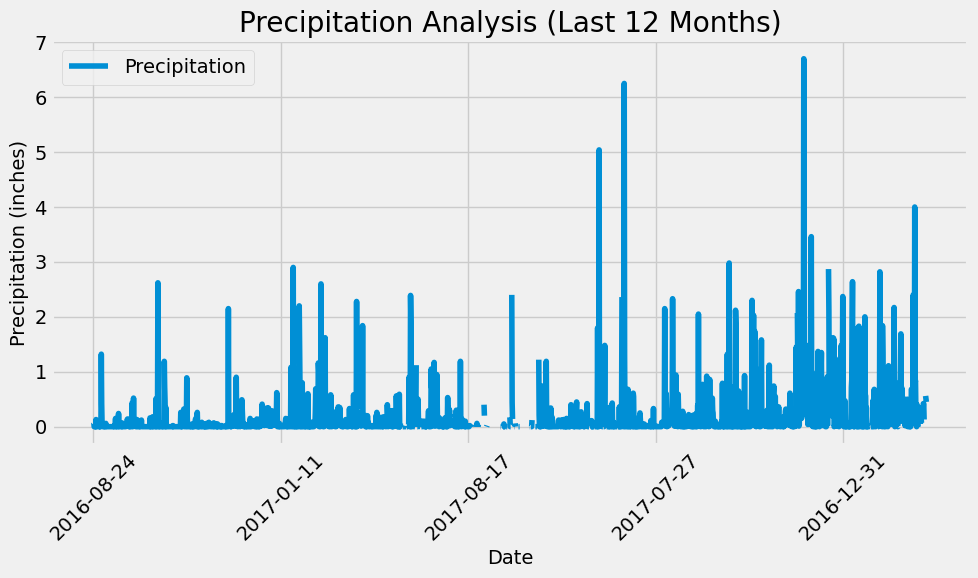

In [7]:
# Precipitation Analysis
import datetime as dt

# Calculate the last date in the dataset
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
last_date = dt.datetime.strptime(last_date, '%Y-%m-%d')

# Calculate the date one year ago from the last date in the dataset
one_year_ago = last_date - dt.timedelta(days=365)

# Retrieve the last 12 months of precipitation data
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Load the data into a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])
precipitation_df.set_index('Date', inplace=True)

# Plot the data
precipitation_df.plot(figsize=(10, 6))
plt.title("Precipitation Analysis (Last 12 Months)")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Close the session
session.close()


In [9]:
# Import necessary libraries
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.automap import automap_base

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create an inspector to gather information about the database
inspector = inspect(engine)

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Print the table names
table_names = inspector.get_table_names()
print("Table Names:")
for table_name in table_names:
    print(table_name)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement



Table Names:
measurement
station


In [6]:
# View all of the classes that automap found


['measurement', 'station']

In [11]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# references to the Station and Measurement classes
# these classes to interact with the database



In [13]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session (link) to the database
session = Session(engine)

# Now you have a session object that you can use to interact with the database


# Exploratory Precipitation Analysis

In [16]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import datetime as dt

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session (link) to the database
session = Session(engine)

# Find the most recent date in the data set
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

print("The most recent date in the dataset:", most_recent_date)

# Close the session
session.close()


The most recent date in the dataset: 2017-08-23 00:00:00


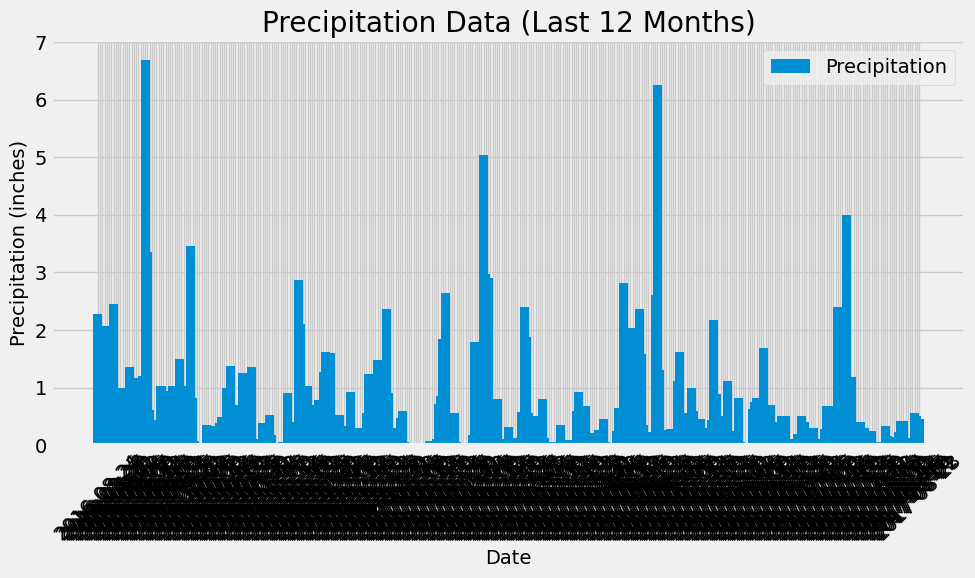

In [17]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session (link) to the database
session = Session(engine)

# Find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in the dataset
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_df.sort_values(by='Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(precipitation_df['Date'], precipitation_df['Precipitation'], width=4, label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Data (Last 12 Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

# Close the session
session.close()



In [18]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session (link) to the database
session = Session(engine)

# Find the most recent date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in the dataset
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Calculate summary statistics for precipitation data
summary_stats = precipitation_df['Precipitation'].describe()

print("Summary Statistics for Precipitation Data:")
print(summary_stats)

# Close the session
session.close()


Summary Statistics for Precipitation Data:
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [19]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session (link) to the database
session = Session(engine)

# Calculate the total number of stations in the dataset
total_stations = session.query(Station).count()

print("Total number of stations:", total_stations)

# Close the session
session.close()


Total number of stations: 9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import func

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session (link) to the database
session = Session(engine)

# Query to find the most active station and its id
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

# Get the station id of the most active station
most_active_station_id = most_active_station[0]

# Calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).first()

print("Temperature Statistics for the Most Active Station:")
print("Lowest Temperature:", temperature_stats[0])
print("Highest Temperature:", temperature_stats[1])
print("Average Temperature:", temperature_stats[2])

# Close the session
session.close()


Temperature Statistics for the Most Active Station:
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


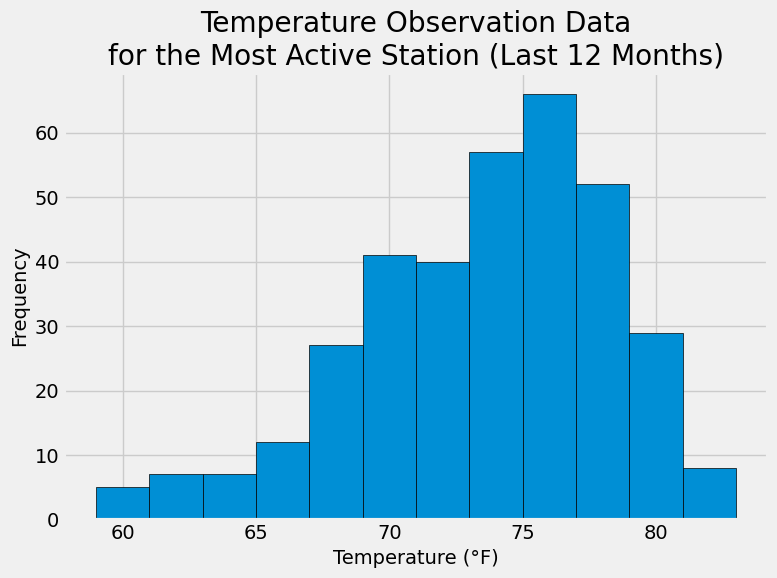

In [21]:
# Import necessary libraries
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Create an engine to connect to the existing SQLite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a base for the automap
Base = automap_base()

# Reflect the tables in the database
Base.prepare(engine, reflect=True)

# Save references to the reflected classes
Station = Base.classes.station
Measurement = Base.classes.measurement

# Create a session (link) to the database
session = Session(engine)

# Query to find the most active station and its id
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

# Get the station id of the most active station
most_active_station_id = most_active_station[0]

# Calculate the date one year from the last date in the dataset
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d')
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station_id).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])

# Plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_df['Temperature'], bins=12, edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data\nfor the Most Active Station (Last 12 Months)')
plt.tight_layout()
plt.show()

# Close the session
session.close()


# Close Session

In [22]:
# Close Session
session.close()